## OSLOM ## 
подберём такие параметры, которые бы давали максимальное значение nmi

In [11]:
import numpy as np
import random
random.seed = 108
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline

In [2]:
!pwd

/home/latna/aponom/clustering_edited/Scripts


In [13]:
def generate_params(params):
    keys = list(params.keys())
    if len(keys) == 1:
        for value in params[keys[0]]:
            yield ( keys[0] + " " + str(value) )        
    if len( keys ) > 1:
        for value in params[keys[0]]:
            for remain_params in generate_params({k:params[k] for k in keys[1:]}):
                yield ( keys[0] + " " + str(value) + " " + remain_params )

In [162]:
def oslom_experiment(inputFileFull, groundTruth, params = {}, vertexNumerationShift=0, verbose=False):
    datasetName = inputFileFull.split('/')[-2]
    outputDir = "../Results/OSLOM2_{}".format(datasetName)
    inputFile =  outputDir + '/' + inputFileFull.split('/')[-1]
    outputFile = outputDir + '/' + inputFileFull.split('/')[-1] + "_oslo_files/tp"
#     outputFile = outputDir + '/' "tp"
    
    !mkdir {outputDir}
    !cp {inputFileFull} {outputDir}
    
    print("Output dir name: {}".format(outputDir) )
    print("old inputFileName : {}".format(inputFileFull) )
    print("new inputFileName : {}".format(inputFile) )
    print("Output file name: {}".format(outputFile) )
    
    !mkdir {outputDir}
    
    all_results = {}
    bestParam = "not found"
    onmi_best = 0;
    for param in tqdm(list(generate_params(params))):
        tmp=!(cd {outputDir} && ../../related_methods/OSLOM2/oslom_undir -f ../{inputFile} -uw {param})
        if verbose:
            print(tmp)
        !sed -i '/^#/d' {outputFile}
        lines=[]
        with open(outputFile) as f:
            lines = f.readlines()    
        with open(outputFile, 'w') as the_file:
            for line in lines:
                the_file.write(" ".join([str(int(a)+vertexNumerationShift) for a in line.split()]) + "\n")
        output = !../Overlapping-NMI/onmi {groundTruth} {outputFile}
        onmi=float(output[0].split()[1])
        all_results[param] = onmi
        if onmi >  onmi_best:
            bestParam = param
            onmi_best = onmi
            
            
    mean_results = {}
    for line, value in all_results.items():
        key = " ".join(line.split()[:4])
        if key in mean_results:
            mean_results[key].append(value)
        else:
            mean_results[key] = [value]
        
    onmi_best_avg = np.max([np.mean(values) for key, values in mean_results.items() ])
   
            
    print("Best of Max ONMI: {} params: '{}'".format(onmi_best, bestParam) )  
    print("Best of Avarage ONMI: {} params: '{}'".format(onmi_best_avg, bestParam) )                   
    return all_results

In [95]:
def plot_graph_for_all_results(all_results, datasetName, random_choice='max'):
    xdata=[]
    ydata=[]
    zdata=[]
    df = pd.DataFrame()
    for param, onmi in all_results.items():
        splited = param.split()
        xdata.append(float(splited[1]))
        ydata.append(float(splited[3]))
        zdata.append(onmi)
        df = df.append({'x': float(splited[1]), 'y': float(splited[3]) , 'seed': int(splited[5]), 'z': onmi}, ignore_index=True)

    df_ddd = df.groupby(['x','y'], as_index=False)['z'].max()
    if (random_choice == 'mean'):
        df_ddd = df.groupby(['x','y'], as_index=False)['z'].mean()
    
    #coolwarm  viridis
    fig = plt.figure(figsize=(12, 10), dpi= 80)
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(df_ddd.x.values, df_ddd.y.values, df_ddd.z.values, cmap='plasma', edgecolor='none')
    ax.view_init(30, 55)
    ax.set_xlabel('t parameter')
    ax.set_ylabel('cp paramter')
    ax.set_zlabel('onmi vlue');
    ax.set_title('OSLOM\n Onmi {} values for 10-random seeds\nDataset: {}'.format(random_choice.upper(), datasetName));

# School Friendship #

In [192]:
params={}
params["-t"] = np.arange(0.05, 0.95, 0.1)
params["-cp"] = np.arange(0.05, 0.95, 0.1)
params["-seed"] = random.sample(range(1, 100), 10)

inputFile = "../datasets/school_friendship/school-2.dat"
groundTruth = "../datasets/school_friendship/truth-school.dat"

all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

mkdir: cannot create directory ‘../Results/OSLOM2_school_friendship’: File exists
Output dir name: ../Results/OSLOM2_school_friendship
old inputFileName : ../datasets/school_friendship/school-2.dat
new inputFileName : ../Results/OSLOM2_school_friendship/school-2.dat
Output file name: ../Results/OSLOM2_school_friendship/school-2.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_school_friendship’: File exists



Best of Max ONMI: 0.678634 params: '-t 0.35000000000000003 -cp 0.45000000000000007 -seed 63'
Best of Avarage ONMI: 0.5651837999999999 params: '-t 0.35000000000000003 -cp 0.45000000000000007 -seed 63'


In [ ]:
plot_graph_for_all_results(all_results, "school_friendship", random_choice="mean")

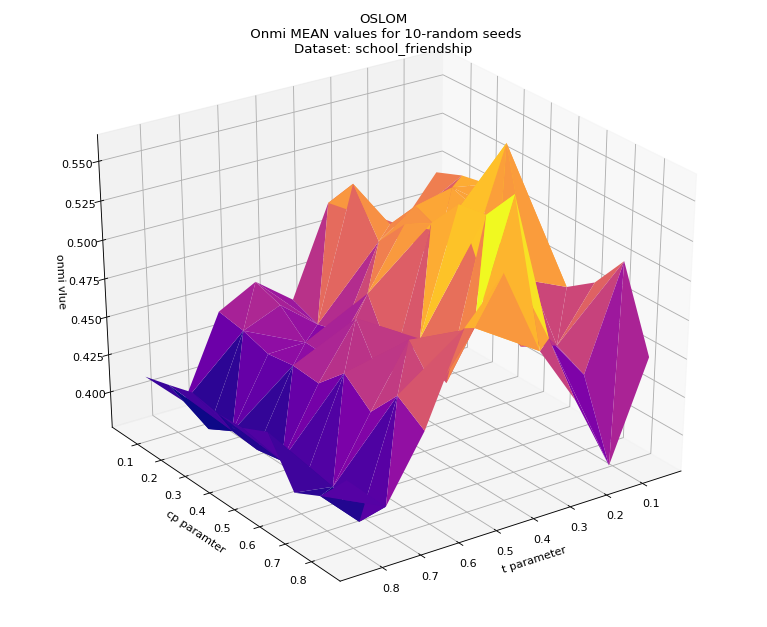

In [97]:
plot_graph_for_all_results(all_results, "school_friendship", random_choice='mean')

![oslom_school](../final_pictures/oslom_school_result.png)

## Karate Club ##

In [193]:
inputFile = "../datasets/karate/karate.dat"
groundTruth = "../datasets/karate/truth_karate.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_karate’: File exists
Output dir name: ../Results/OSLOM2_karate
old inputFileName : ../datasets/karate/karate.dat
new inputFileName : ../Results/OSLOM2_karate/karate.dat
Output file name: ../Results/OSLOM2_karate/karate.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_karate’: File exists



Best of Max ONMI: 1.0 params: '-t 0.35000000000000003 -cp 0.05 -seed 76'
Best of Avarage ONMI: 0.9586149 params: '-t 0.35000000000000003 -cp 0.05 -seed 76'


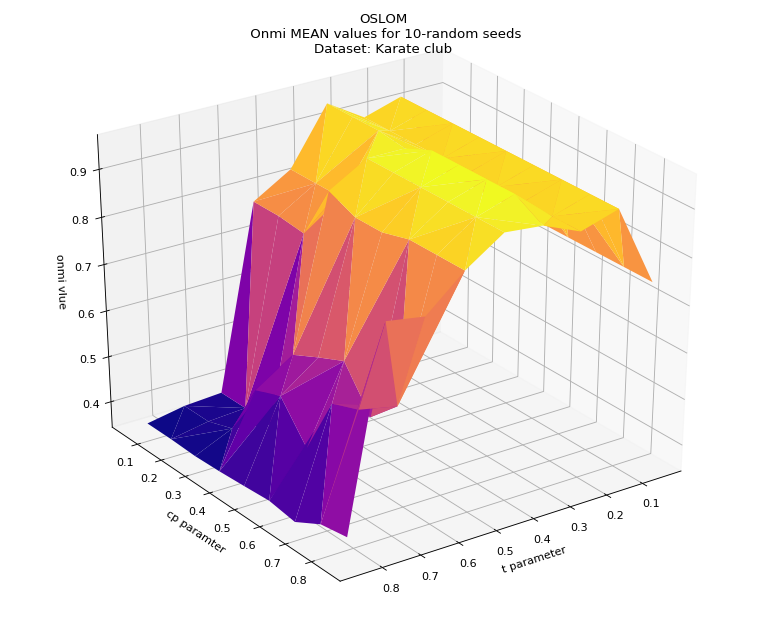

In [194]:
plot_graph_for_all_results(all_results, "Karate club", random_choice='mean')

![oslom_karate](../final_pictures/oslom_karate.png "Oslom Karate Club")

## Adj noun##

In [195]:
inputFile = "../datasets/adjnoun/adjnoun.dat"
groundTruth = "../datasets/adjnoun/truth_adjnoun.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_adjnoun’: File exists
Output dir name: ../Results/OSLOM2_adjnoun
old inputFileName : ../datasets/adjnoun/adjnoun.dat
new inputFileName : ../Results/OSLOM2_adjnoun/adjnoun.dat
Output file name: ../Results/OSLOM2_adjnoun/adjnoun.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_adjnoun’: File exists



Best of Max ONMI: 0.0620827 params: '-t 0.05 -cp 0.05 -seed 33'
Best of Avarage ONMI: 0.062082700000000005 params: '-t 0.05 -cp 0.05 -seed 33'


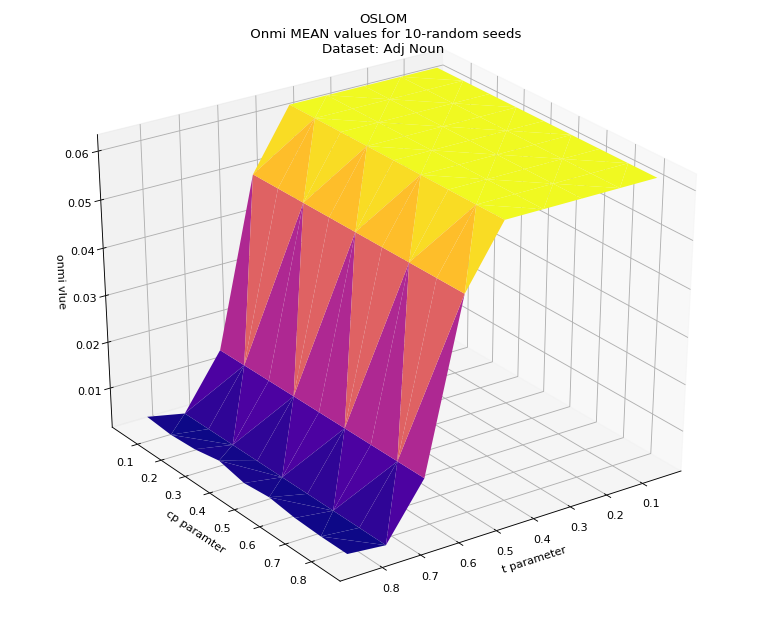

In [196]:
plot_graph_for_all_results(all_results, "Adj Noun", random_choice='mean')

## American Football League ##

In [197]:
inputFile = "../datasets/football/footballTSEinput_original.dat"
groundTruth = "../datasets/football/truth_footballTSEinput.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

mkdir: cannot create directory ‘../Results/OSLOM2_football’: File exists
Output dir name: ../Results/OSLOM2_football
old inputFileName : ../datasets/football/footballTSEinput_original.dat
new inputFileName : ../Results/OSLOM2_football/footballTSEinput_original.dat
Output file name: ../Results/OSLOM2_football/footballTSEinput_original.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_football’: File exists



Best of Max ONMI: 0.920835 params: '-t 0.15000000000000002 -cp 0.25000000000000006 -seed 76'
Best of Avarage ONMI: 0.9077013 params: '-t 0.15000000000000002 -cp 0.25000000000000006 -seed 76'


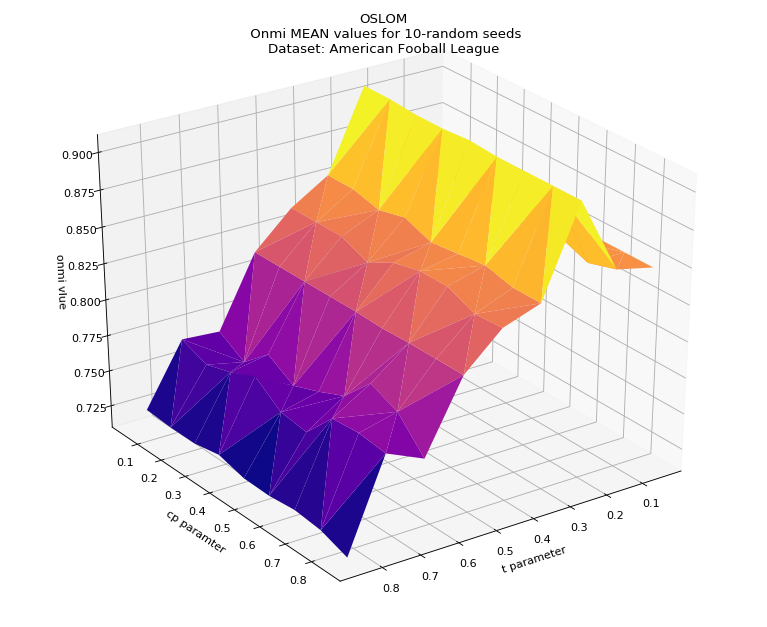

In [198]:
plot_graph_for_all_results(all_results, "American Fooball League", random_choice='mean')

![oslom_football](../final_pictures/oslom_football.png "Oslom Americal Football League")

## Politic Books ##

In [199]:
inputFile = "../datasets/polbooks/polbooks.dat"
groundTruth = "../datasets/polbooks/truth_polbooks.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_polbooks’: File exists
Output dir name: ../Results/OSLOM2_polbooks
old inputFileName : ../datasets/polbooks/polbooks.dat
new inputFileName : ../Results/OSLOM2_polbooks/polbooks.dat
Output file name: ../Results/OSLOM2_polbooks/polbooks.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_polbooks’: File exists



Best of Max ONMI: 0.474083 params: '-t 0.05 -cp 0.6500000000000001 -seed 73'
Best of Avarage ONMI: 0.4382833 params: '-t 0.05 -cp 0.6500000000000001 -seed 73'


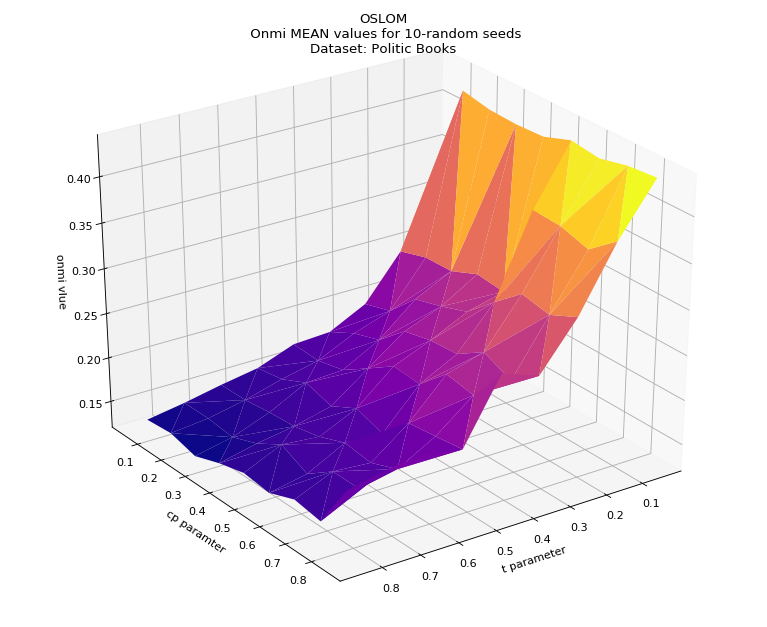

In [200]:
plot_graph_for_all_results(all_results, "Politic Books", random_choice='mean')

![oslom_polic_books](../final_pictures/oslom_polbooks.png "Oslom Politic Books")

# Syntetic Datasets #

## bench_30##

In [163]:
inputFile = "../datasets/bench_30/bench_30_network.dat"
groundTruth = "../datasets/bench_30/bench_30_truth.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_bench_30’: File exists
Output dir name: ../Results/OSLOM2_bench_30
old inputFileName : ../datasets/bench_30/bench_30_network.dat
new inputFileName : ../Results/OSLOM2_bench_30/bench_30_network.dat
Output file name: ../Results/OSLOM2_bench_30/bench_30_network.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_bench_30’: File exists



Best of Max ONMI: 0.931866 params: '-t 0.15000000000000002 -cp 0.05 -seed 90'
Best of Avarage ONMI: 0.9246478 params: '-t 0.15000000000000002 -cp 0.05 -seed 90'


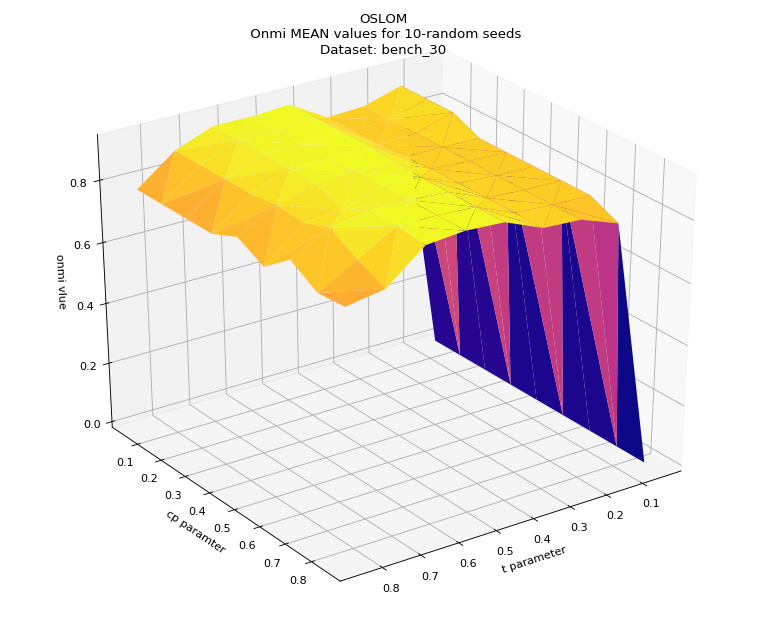

In [164]:
plot_graph_for_all_results(all_results, "bench_30", random_choice='mean')

![oslom_bench_30](../final_pictures/oslom_bench_30.png "Oslom bench_30")

## bench_40##

In [184]:
inputFile = "../datasets/bench_40/bench_40_network.dat"
groundTruth = "../datasets/bench_40/bench_40_truth.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_bench_40’: File exists
Output dir name: ../Results/OSLOM2_bench_40
old inputFileName : ../datasets/bench_40/bench_40_network.dat
new inputFileName : ../Results/OSLOM2_bench_40/bench_40_network.dat
Output file name: ../Results/OSLOM2_bench_40/bench_40_network.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_bench_40’: File exists



Best of Max ONMI: 0.635964 params: '-t 0.45000000000000007 -cp 0.05 -seed 66'
Best of Avarage ONMI: 0.6039149 params: '-t 0.45000000000000007 -cp 0.05 -seed 66'


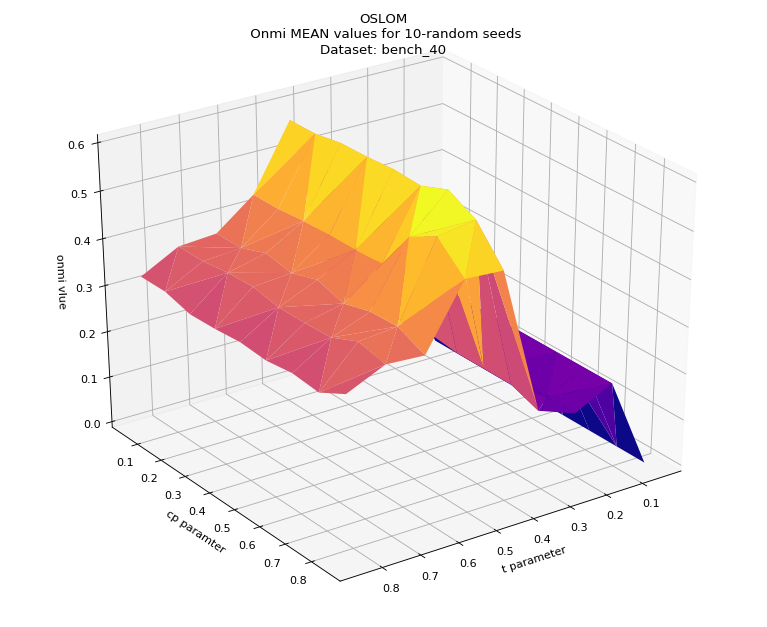

In [185]:
plot_graph_for_all_results(all_results, "bench_40", random_choice='mean')

![oslom_bench_40](../final_pictures/oslom_bench_40.png "Oslom bench_40")

## bench_50##

In [186]:
inputFile = "../datasets/bench_50/bench_50_network.dat"
groundTruth = "../datasets/bench_50/bench_50_truth.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_bench_50’: File exists
Output dir name: ../Results/OSLOM2_bench_50
old inputFileName : ../datasets/bench_50/bench_50_network.dat
new inputFileName : ../Results/OSLOM2_bench_50/bench_50_network.dat
Output file name: ../Results/OSLOM2_bench_50/bench_50_network.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_bench_50’: File exists



Best of Max ONMI: 0.886444 params: '-t 0.5500000000000002 -cp 0.35000000000000003 -seed 26'
Best of Avarage ONMI: 0.7614544999999999 params: '-t 0.5500000000000002 -cp 0.35000000000000003 -seed 26'


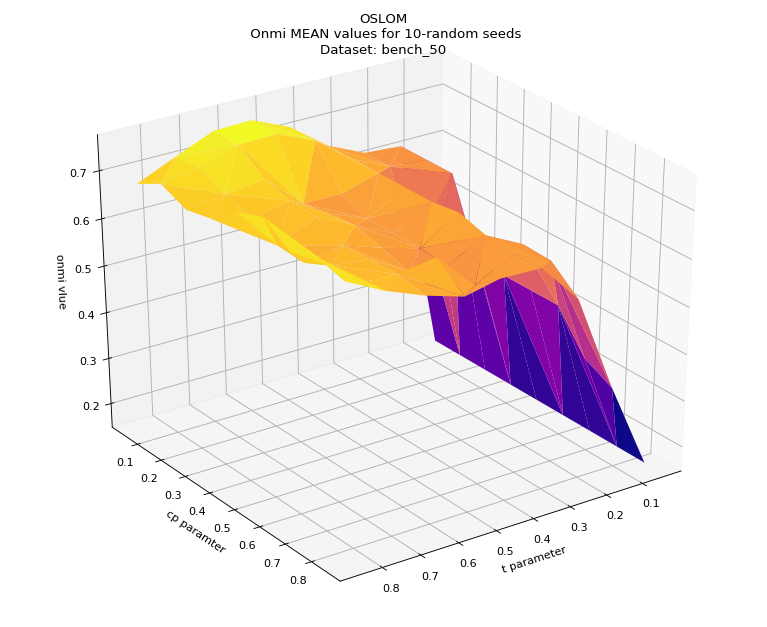

In [187]:
plot_graph_for_all_results(all_results, "bench_50", random_choice='mean')

![oslom_bench_50](../final_pictures/oslom_bench_50.png "Oslom bench_50")

## bench_60##

In [188]:
inputFile = "../datasets/bench_60/bench_60_network.dat"
groundTruth = "../datasets/bench_60/bench_60_truth.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_bench_60’: File exists
Output dir name: ../Results/OSLOM2_bench_60
old inputFileName : ../datasets/bench_60/bench_60_network.dat
new inputFileName : ../Results/OSLOM2_bench_60/bench_60_network.dat
Output file name: ../Results/OSLOM2_bench_60/bench_60_network.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_bench_60’: File exists



Best of Max ONMI: 0.793144 params: '-t 0.35000000000000003 -cp 0.05 -seed 26'
Best of Avarage ONMI: 0.7709094999999999 params: '-t 0.35000000000000003 -cp 0.05 -seed 26'


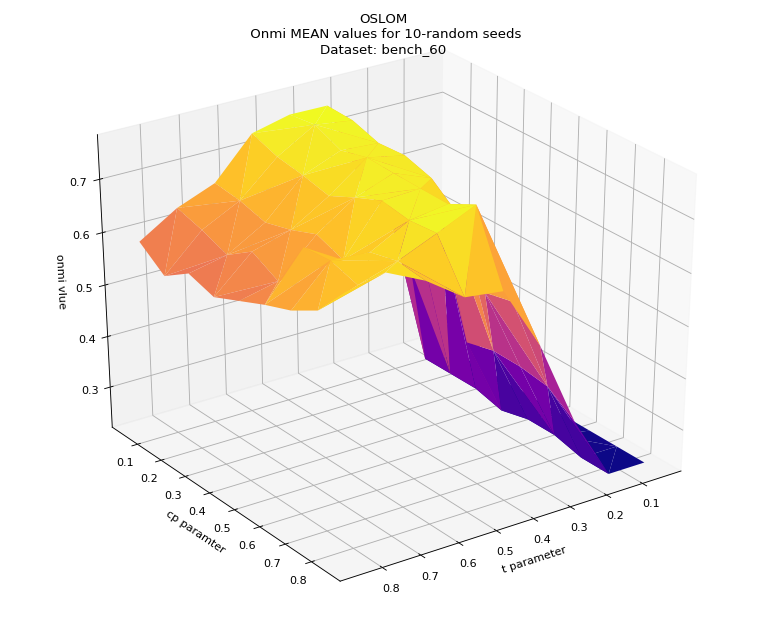

In [189]:
plot_graph_for_all_results(all_results, "bench_60", random_choice='mean')

![oslom_bench_60](../final_pictures/oslom_bench_60.png "Oslom bench_60")

## bench_60_dense ##

In [190]:
inputFile = "../datasets/bench_60_dense/bench_60_dense_network.dat"
groundTruth = "../datasets/bench_60_dense/bench_60_dense_truth.dat"
all_results = oslom_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘../Results/OSLOM2_bench_60_dense’: File exists
Output dir name: ../Results/OSLOM2_bench_60_dense
old inputFileName : ../datasets/bench_60_dense/bench_60_dense_network.dat
new inputFileName : ../Results/OSLOM2_bench_60_dense/bench_60_dense_network.dat
Output file name: ../Results/OSLOM2_bench_60_dense/bench_60_dense_network.dat_oslo_files/tp
mkdir: cannot create directory ‘../Results/OSLOM2_bench_60_dense’: File exists



Best of Max ONMI: 0.573103 params: '-t 0.8500000000000002 -cp 0.05 -seed 10'
Best of Avarage ONMI: 0.5128860000000001 params: '-t 0.8500000000000002 -cp 0.05 -seed 10'


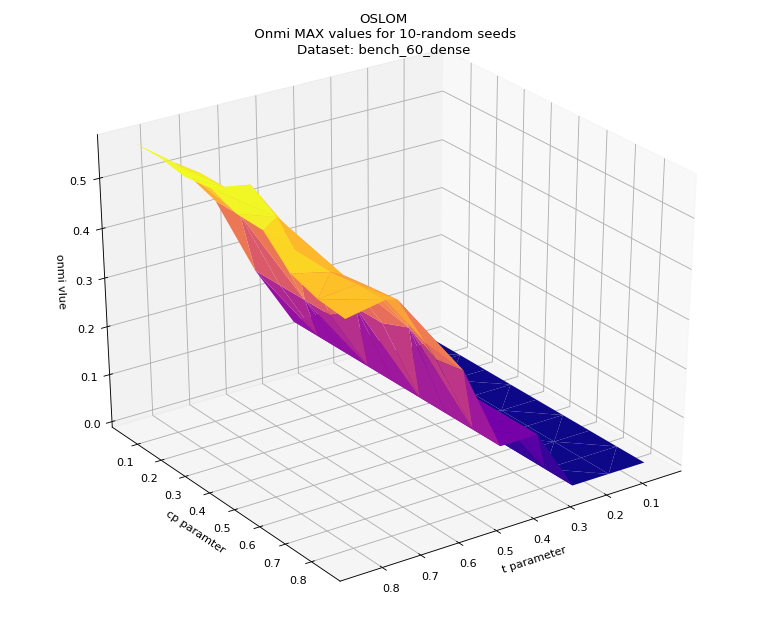

In [191]:
plot_graph_for_all_results(all_results, "bench_60_dense", random_choice='mean')

![oslom_bench_60_dense](../final_pictures/oslom_bench_60_dense.png "Oslom bench_60_dense")